<a href="https://colab.research.google.com/github/rootdrew27/ai-educational/blob/main/Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Neural Nets (using micrograd)

# Installs and Imports

In [31]:
!pip install micrograd
!pip install graphviz

In [32]:
from graphviz import Digraph

from micrograd import nn
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

import numpy as np
import math
import random

import matplotlib.pyplot as plt
%matplotlib inline

## Misc Functions

In [33]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

# Playground

Observe how the gradient is updated after back-propogation

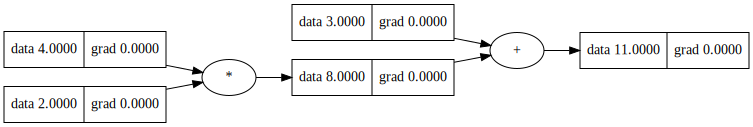

In [34]:
# Build a neural network manually
# a simple example

np.random.seed(1337)
random.seed(1337)

input = Value(2.0)
w = Value(4.0)
b = Value(3.0)

y = w * input
L = y + b

draw_dot(L)

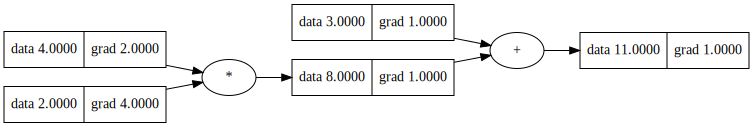

In [35]:
L.backward()
draw_dot(L)

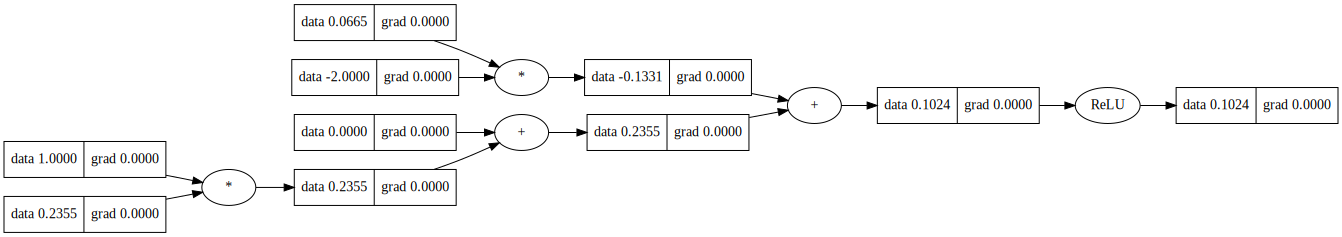

In [36]:
# Using the Neuron class

np.random.seed(1337)
random.seed(1337)
n = nn.Neuron(2) #CHALLENGE 1: What happens when you change 'nin'? Does it make sense to change it?
x = [Value(1.0), Value(-2.0)]
y = n(x)
draw_dot(y)

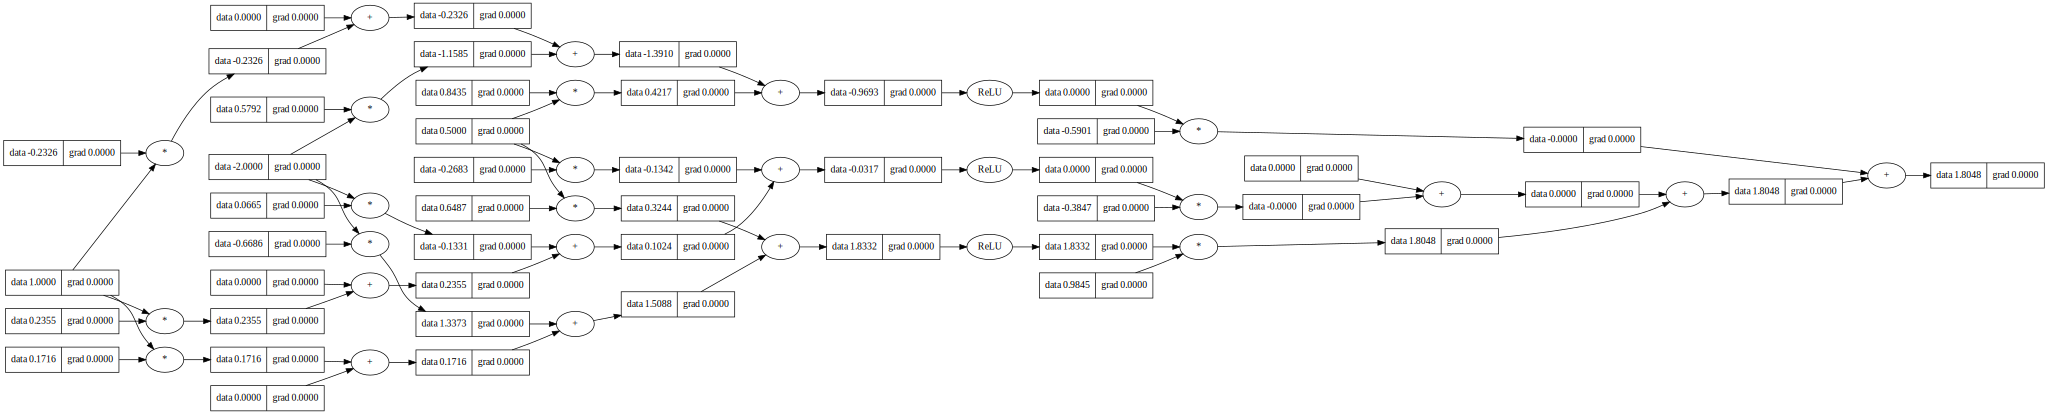

In [37]:
random.seed(1337)
np.random.seed(1337)

# A simple Multi-layer Preceptron

mlp = MLP(3, [3, 1]) # CHALLENGE 2: Make this network more expressive!
x = [Value(1.0), Value(-2.0), Value(0.5)]
y = mlp(x)

draw_dot(y)

In [38]:
# MSE
def mse(y_pred, y_true):
  losses = [(pred - true)**2 for pred, true in zip(y_pred, y_true)]
  loss = sum(losses) * (1.0 / len(losses))
  return loss

In [39]:
# CHALLENGE 3: Implement a Loss function
# Mean Absolute Error looks easy...
#
# Loss Functions: https://builtin.com/machine-learning/common-loss-functions

def your_loss_func(y_pred, y_true):
  loss = None
  return loss

In [46]:
# Labeled Data

inputs = [
    [0.2, -0.1, 0.2, 0.1],
    [0.2, 0.1, 0.4, 0.4],
    [0.1, -0.1, 0.3, 0.1],
    [0.1, 0.4, 0.4, 0.1],
    [0.3, -0.2, -0.2, 0.1],
    [0.3, 0.15, 0.3, 0.4],
    [0.2, 0.0, -0.3, 0.2],
    [0.2, 0.5, -0.4, 0.2]
]

y_true = [5, 2, 3, 2, 1, -1, 2, 4]

In [53]:
# Model

model = MLP(4, [16, 4, 1]) #CHALLENGE 4: Describe this Network using matrices

In [54]:
# Training

# (iters) number of iterations
# (n_net) the neural network
# (l_func) the loss func
# (inputs) the input data to be trained upon
# (y_true) the true values

def train(iters, n_net, l_func, learning_rate, inputs, y_true):
  for i in range(iters):

    # forward pass
    preds = [n_net(input) for input in inputs]
    loss = l_func(preds, y_true)
    print(f'Loss at iteration {i}: {loss.data}')

    # backward pass
    n_net.zero_grad()
    loss.backward()

    # update parameters
    for p in n_net.parameters():
      p.data -= learning_rate * p.grad # CHALLENGE 5: Implement decaying learning rate.

  return n_net, loss # ignore this linting error

In [ ]:
model, loss = train(
    iters=10,
    n_net=model,
    l_func=mse,
    learning_rate=.1,
    inputs=inputs,
    y_true=y_true
)

In [ ]:
# CHALLENGE 6: Explain the significance of the 'data' and 'grad' of this parameter.

model.layers[1].neurons[0].parameters()[0]

# Next Steps

<br>

[Micrograd](https://github.com/karpathy/micrograd)
<br>
<br>
[Micrograd Tutorial (by Karpathy)](https://www.youtube.com/watch?v=VMj-3S1tku0&ab_channel=AndrejKarpathy)
<br>
<br>
[Pytorch Tutorials](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
<br>
<br>
[Backpropagation](https://www.youtube.com/watch?v=tIeHLnjs5U8&ab_channel=3Blue1Brown)
<br>
<br>
[Visualization](https://www.youtube.com/watch?v=TkwXa7Cvfr8&ab_channel=EmergentGarden)
